# Face Recognition -Model4
使用MTCNN進行人臉偵測

使用自建CNN模型進行人臉辨識

使用kaggle5位日本明星資料集

進行靜態圖像辨識


In [1]:
# 將警告訊息關掉
import warnings
warnings.filterwarnings('ignore')

#Utilities相關函式庫
import os
import sys

# 圖像處理函示庫
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# 數值處理函式庫
import pandas as pd
import numpy as np

# 機器學習函式庫
from sklearn.model_selection import train_test_split

# 深度學習函式庫
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import RMSprop, Adam, SGD
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

# 人臉偵測函式庫
from mtcnn import MTCNN
detector = MTCNN()

# 相關參數設定
picture_size = 224
batch_size = 8  # 一次用多少筆資料更新模型
num_classes = 5  # 資料集有幾個類別
epochs = 300      # 訓練迭代次數
save_dir = os.path.join(os.getcwd(), 'saved_models') # 儲存模型的路徑
model_name = 'Model4_VGG2X_V3, trained_model.h5' # 模型名稱


Using TensorFlow backend.


In [2]:
# 直接讀取處理好的檔案
total_img_resized = np.load('total_crop_resized.npy')
labelnames = np.load('labelnames.npy')

In [3]:
# 切分訓練/測試資料
#train_x = total_img
#train_y = labelnames

train_x,test_x, train_y, test_y = train_test_split(total_img_resized,
                                                  labelnames,
                                                test_size = 0.1,stratify= labelnames)#random_state = 123,
print('train:',train_x.shape,'test:',test_x.shape)

# 正規化資料
# 標準化0~255的值到0~1
x_train_normalize = train_x.astype('float32') / 255.0
x_test_normalize = test_x.astype('float32') / 255.0

train: (403, 224, 224, 3) test: (45, 224, 224, 3)


In [36]:
# 建立CNN模型
# CNN層
model = Sequential()

model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = x_train_normalize.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))



model.add(Conv2D(256, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))



model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))




# DNN層
model.add(Flatten())


model.add(Dense(4096))
model.add(Activation('relu'))


model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_143 (Activation)  (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_144 (Activation)  (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_145 (Activation)  (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 112, 112, 64)      0         
__________

In [37]:
# 訓練模型
optimizer = Adam(lr=3e-6,decay=0.0001,beta_1=0.99,beta_2=0.999) #100e-6
model.compile(loss = 'categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])

In [38]:
# Data Augmentation
datagen  = ImageDataGenerator(
            rotation_range = 30,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            horizontal_flip = True, 
            vertical_flip = False,
            shear_range=0.2,
            zoom_range=0.2,
            fill_mode='nearest')

In [39]:
# Use ModelCheckpoint to save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_loss', save_best_only = True, verbose = 1)

earlystop = EarlyStopping(monitor = 'val_loss', patience = 20, verbose = 1) # patience=10為連續10次模型loss沒再下降就停止

# Fit model
aug_ratio = 2
steps_per_epoch = int(aug_ratio * train_x.shape[0] / batch_size)
validation_steps = int(aug_ratio * test_x.shape[0] / batch_size)

model_history = model.fit_generator(datagen.flow(x_train_normalize, train_y, batch_size = batch_size),
                                   epochs = epochs,
                                   validation_data = (x_test_normalize, test_y),
                                   callbacks = [checkpoint, earlystop],
                                   steps_per_epoch=steps_per_epoch,
                                   validation_steps=validation_steps
                                   )

Epoch 1/300
100/100 [==============================] - 14s 144ms/step - loss: 1.6093 - acc: 0.2263 - val_loss: 1.6093 - val_acc: 0.2222

Epoch 00001: val_loss improved from inf to 1.60929, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 2/300
100/100 [==============================] - 11s 107ms/step - loss: 1.6088 - acc: 0.2321 - val_loss: 1.6088 - val_acc: 0.2222

Epoch 00002: val_loss improved from 1.60929 to 1.60880, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 3/300
100/100 [==============================] - 11s 106ms/step - loss: 1.6064 - acc: 0.2271 - val_loss: 1.6074 - val_acc: 0.2222

Epoch 00003: val_loss improved from 1.60880 to 1.60744, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 4/300
100/100 [==============================] - 11s 107ms/step - loss: 1.5982 - acc: 0.2

Epoch 34/300
100/100 [==============================] - 11s 108ms/step - loss: 1.2038 - acc: 0.5221 - val_loss: 1.2499 - val_acc: 0.4889

Epoch 00034: val_loss improved from 1.25386 to 1.24990, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 35/300
100/100 [==============================] - 11s 108ms/step - loss: 1.2032 - acc: 0.4912 - val_loss: 1.2466 - val_acc: 0.5333

Epoch 00035: val_loss improved from 1.24990 to 1.24656, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 36/300
100/100 [==============================] - 11s 108ms/step - loss: 1.1717 - acc: 0.5321 - val_loss: 1.2465 - val_acc: 0.5333

Epoch 00036: val_loss improved from 1.24656 to 1.24649, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 37/300
100/100 [==============================] - 11s 108ms/step - loss: 1.1631 - 

100/100 [==============================] - 11s 108ms/step - loss: 1.0358 - acc: 0.5958 - val_loss: 1.0002 - val_acc: 0.6000

Epoch 00066: val_loss did not improve from 0.99068
Epoch 67/300
100/100 [==============================] - 11s 108ms/step - loss: 1.0024 - acc: 0.6233 - val_loss: 0.9949 - val_acc: 0.5778

Epoch 00067: val_loss did not improve from 0.99068
Epoch 68/300
100/100 [==============================] - 11s 108ms/step - loss: 1.0225 - acc: 0.6021 - val_loss: 0.9627 - val_acc: 0.5778

Epoch 00068: val_loss improved from 0.99068 to 0.96268, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 69/300
100/100 [==============================] - 11s 108ms/step - loss: 0.9560 - acc: 0.6371 - val_loss: 0.9999 - val_acc: 0.6000

Epoch 00069: val_loss did not improve from 0.96268
Epoch 70/300
100/100 [==============================] - 11s 108ms/step - loss: 0.9839 - acc: 0.6291 - val_loss: 1.0150 - val_acc: 0.6222

Epoc

100/100 [==============================] - 11s 108ms/step - loss: 0.9409 - acc: 0.6421 - val_loss: 0.8934 - val_acc: 0.6444

Epoch 00104: val_loss did not improve from 0.84632
Epoch 105/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8863 - acc: 0.6654 - val_loss: 0.8447 - val_acc: 0.6000

Epoch 00105: val_loss improved from 0.84632 to 0.84470, saving model to C:\Users\foresight\Desktop\AI\Face Recognition\saved_models\Model4_VGG2X_V3, trained_model.h5
Epoch 106/300
100/100 [==============================] - 11s 108ms/step - loss: 0.9093 - acc: 0.6441 - val_loss: 0.8540 - val_acc: 0.6000

Epoch 00106: val_loss did not improve from 0.84470
Epoch 107/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8886 - acc: 0.6683 - val_loss: 0.8565 - val_acc: 0.6667

Epoch 00107: val_loss did not improve from 0.84470
Epoch 108/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8730 - acc: 0.6563 - val_loss: 0.8688 - val_acc: 0.6222



100/100 [==============================] - 11s 108ms/step - loss: 0.8493 - acc: 0.6675 - val_loss: 0.8544 - val_acc: 0.6667

Epoch 00142: val_loss did not improve from 0.75868
Epoch 143/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8206 - acc: 0.6766 - val_loss: 0.8356 - val_acc: 0.6889

Epoch 00143: val_loss did not improve from 0.75868
Epoch 144/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8236 - acc: 0.6812 - val_loss: 0.8314 - val_acc: 0.6444

Epoch 00144: val_loss did not improve from 0.75868
Epoch 145/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8385 - acc: 0.6975 - val_loss: 0.8442 - val_acc: 0.6444

Epoch 00145: val_loss did not improve from 0.75868
Epoch 146/300
100/100 [==============================] - 11s 108ms/step - loss: 0.8571 - acc: 0.6580 - val_loss: 0.8003 - val_acc: 0.6222

Epoch 00146: val_loss did not improve from 0.75868
Epoch 147/300
100/100 [==============================] - 11s 108

100/100 [==============================] - 11s 108ms/step - loss: 0.7383 - acc: 0.7250 - val_loss: 0.7498 - val_acc: 0.7111

Epoch 00183: val_loss did not improve from 0.72332
Epoch 184/300
100/100 [==============================] - 11s 108ms/step - loss: 0.7558 - acc: 0.7117 - val_loss: 0.7580 - val_acc: 0.6889

Epoch 00184: val_loss did not improve from 0.72332
Epoch 185/300
100/100 [==============================] - 11s 108ms/step - loss: 0.7504 - acc: 0.7267 - val_loss: 0.7676 - val_acc: 0.7333

Epoch 00185: val_loss did not improve from 0.72332
Epoch 186/300
100/100 [==============================] - 11s 108ms/step - loss: 0.7398 - acc: 0.7358 - val_loss: 0.7496 - val_acc: 0.7333

Epoch 00186: val_loss did not improve from 0.72332
Epoch 187/300
100/100 [==============================] - 11s 108ms/step - loss: 0.7161 - acc: 0.7400 - val_loss: 0.7255 - val_acc: 0.7333

Epoch 00187: val_loss did not improve from 0.72332
Epoch 188/300
100/100 [==============================] - 11s 108

100/100 [==============================] - 11s 108ms/step - loss: 0.7327 - acc: 0.7271 - val_loss: 0.7618 - val_acc: 0.6889

Epoch 00224: val_loss did not improve from 0.69642
Epoch 225/300
100/100 [==============================] - 11s 108ms/step - loss: 0.6737 - acc: 0.7496 - val_loss: 0.7689 - val_acc: 0.7111

Epoch 00225: val_loss did not improve from 0.69642
Epoch 226/300
100/100 [==============================] - 11s 108ms/step - loss: 0.6803 - acc: 0.7346 - val_loss: 0.7199 - val_acc: 0.7333

Epoch 00226: val_loss did not improve from 0.69642
Epoch 227/300
100/100 [==============================] - 11s 108ms/step - loss: 0.7087 - acc: 0.7388 - val_loss: 0.7144 - val_acc: 0.7333

Epoch 00227: val_loss did not improve from 0.69642
Epoch 228/300
100/100 [==============================] - 11s 108ms/step - loss: 0.7133 - acc: 0.7408 - val_loss: 0.7249 - val_acc: 0.7111

Epoch 00228: val_loss did not improve from 0.69642
Epoch 229/300
100/100 [==============================] - 11s 108

In [30]:
# loading save model
print('Loading trained model')
model_path = os.path.join(save_dir, model_name)
model = load_model(model_path)

# Score trained model
scores = model.evaluate(x_test_normalize, test_y, verbose = 1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Loading trained model
45/45 [==============================] - 1s 16ms/step
Test loss: 0.609598163763682
Test accuracy: 0.7555555595291985


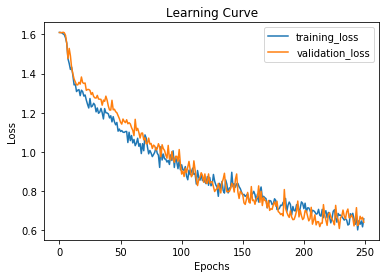

In [31]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()